In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# nfragments

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from ast import literal_eval as make_tuple
import matplotlib.pyplot as plt
import os

RESULT_NAME = "1660417292_result_BS_32_MD_16_T_0_TT_0.5_K_2"
figFolder = f'_results/{RESULT_NAME}_figures'
os.makedirs(figFolder, exist_ok=True)

data = pd.read_csv(f'_results/{RESULT_NAME}.txt', names=['score','acc','macs','params','path','fragments'])

sns.set_theme()

In [5]:
print('# network generated: ', len(data))

# network generated:  89


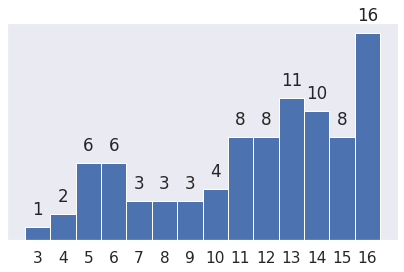

In [6]:
nfragments = [len(make_tuple(fragments)) for fragments in data['fragments']]

sns.set(font_scale = 1.4)
fig, ax = plt.subplots(figsize=[7, 4])
sns.set(font_scale = 1.4)

ax.grid(False)
# ax.hist(nfragments)

# n, bins, patches = ax.hist(nfragments, bins=5)
n, bins, patches = ax.hist(nfragments, np.array(range(min(nfragments)-1,max(nfragments)+1))+0.5)
# plt.xticks(range(min(nfragments),max(nfragments)+1))
# plt.xlabel('Number of fragments')
# plt.tick_params(left = False, labelleft = False)

xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{}".format(int((value+bins[idx+1])/2.)) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)

# remove y ticks
plt.yticks([])

# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+1, int(value), ha='center')
# plt.subplots_adjust(bottom=0.2)
plt.savefig(f'{figFolder}/numfragments.eps',bbox_inches='tight')

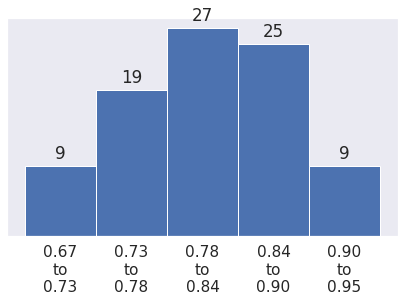

In [7]:
acc = data['acc']

fig, ax = plt.subplots(figsize=[7, 4])
ax.grid(False)
n, bins, patches = ax.hist(acc, bins=5)
# plt.xlabel('Accuracy')
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)

# remove y ticks
plt.yticks([])

# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+1, int(value), ha='center')

plt.savefig(f'{figFolder}/accuracy.eps',bbox_inches='tight')

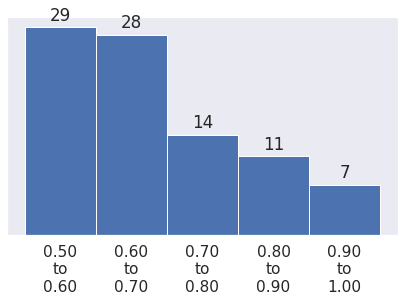

In [8]:
score = data['score']

fig, ax = plt.subplots(figsize=[7, 4])
ax.grid(False)
n, bins, patches = ax.hist(score, bins=5)
# plt.xlabel('Score')
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)

# remove y ticks
plt.yticks([])

# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+1, int(value), ha='center')
plt.savefig(f'{figFolder}/score.eps',bbox_inches='tight')

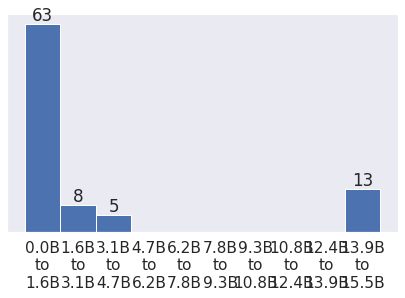

In [9]:
import matplotlib.pyplot as plt

macs = data['macs']

fig, ax = plt.subplots(figsize=[7, 4])
ax.grid(False)
n, bins, patches = ax.hist(macs, bins=10)
# plt.xlabel('# MACs (in billions)')
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.1f}B\nto\n{:.1f}B".format(value/1000000000,bins[idx+1]/1000000000) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)

# remove y ticks
plt.yticks([])

# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+1, int(value), ha='center')
plt.savefig(f'{figFolder}/macs.eps',bbox_inches='tight')

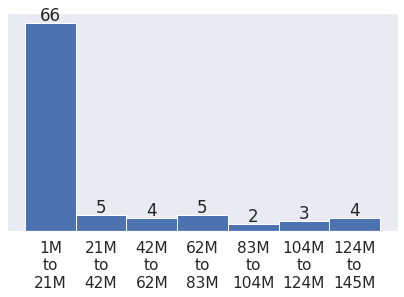

In [10]:
import matplotlib.pyplot as plt

params = data['params']

fig, ax = plt.subplots(figsize=[7, 4])
ax.grid(False)

n, bins, patches = ax.hist(params, bins=7)
# plt.xlabel('# Params (in millions)')
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.0f}M\nto\n{:.0f}M".format(value/1000000,bins[idx+1]/1000000) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)

# remove y ticks
plt.yticks([])

# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+1, int(value), ha='center')
plt.savefig(f'{figFolder}/params.eps',bbox_inches='tight')

In [11]:
from glob import glob
import os
originalValTrainAcc = {}
originalFiles = sorted(glob('_results/original/*.txt'))
originalNetNames = []
for originalFile in originalFiles:
    name = os.path.basename(originalFile)
    name = os.path.splitext(name)[0]
    originalNetNames.append(name)
    originalValTrainAcc[name] = pd.read_csv(originalFile, names=['valacc', 'trainacc','macs','params','score','fragments'])
    originalValTrainAcc[name] = originalValTrainAcc[name].iloc[0]
    originalValTrainAcc[name]['acc'] = originalValTrainAcc[name].valacc   
    originalValTrainAcc[name].name = name
    print(originalValTrainAcc[name])


valacc                                                0.699804
trainacc                                              0.693872
macs                                               714695028.0
params                                                61100840
score                                                 0.892841
fragments    ((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5...
acc                                                   0.699804
Name: alexnet, dtype: object
valacc                                       0.845776
trainacc                                     0.840784
macs                                     2841274151.2
params                                        8040040
score                                        0.998432
fragments    ((1, 0), (1, 1), (1, 2), (1, 3), (1, 4))
acc                                          0.845776
Name: densenet121, dtype: object
valacc                                                0.779371
trainacc                                              0.

In [12]:
# originalValTrainAcc[name]

In [14]:
acc_minidx = data['acc'].idxmin()
acc_maxidx = data['acc'].idxmax()
param_minidx = data['params'].idxmin()
param_maxidx = data['params'].idxmax()

originalValTrainAcc['best_stitchnet'] = data.iloc[acc_maxidx]
originalValTrainAcc['best_stitchnet'].name = 'best_stitchnet'
originalValTrainAcc['smallest_stitchnet'] = data.iloc[param_minidx]
originalValTrainAcc['smallest_stitchnet'].name = 'smallest_stitchnet'
originalValTrainAcc['stitchnet27'] = data.iloc[27]
originalValTrainAcc['stitchnet27'].name = 'stitchnet27'

In [15]:
# originalValTrainAcc

In [16]:
import pandas as pd

resultdata = pd.DataFrame(originalValTrainAcc.values())
resultdata = resultdata.sort_values('acc', ascending=False)

In [17]:
resultdata

,valacc,trainacc,macs,params,score,fragments,acc,path
best_stitchnet,NaN,NaN,2.841274e+09,8040040,0.910151,"((1, 0), (1, 1), (1, 2), (1, 3), (3, 5))",0.952259,_results/1660417292_result_BS_32_MD_16_T_0_TT_...
stitchnet27,NaN,NaN,6.116193e+07,3586400,0.941655,"((2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5...",0.855010,_results/1660417292_result_BS_32_MD_16_T_0_TT_...
resnet50,0.848919,0.843596,4.099839e+09,25530472,0.987678,"((3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5))",0.848919,NaN
densenet121,0.845776,0.840784,2.841274e+09,8040040,0.998432,"((1, 0), (1, 1), (1, 2), (1, 3), (1, 4))",0.845776,NaN
vgg16,0.811788,0.803566,1.548098e+10,138357544,0.846680,"((4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5...",0.811788,NaN
mobilenet_v3_small,0.779371,0.776595,6.010987e+07,2536800,0.999287,"((2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5...",0.779371,NaN
smallest_stitchnet,NaN,NaN,4.516002e+07,566112,0.526461,"((2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5...",0.732417,_results/1660417292_result_BS_32_MD_16_T_0_TT_...
alexnet,0.699804,0.693872,7.146950e+08,61100840,0.892841,"((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5...",0.699804,NaN


In [77]:
# for i,item in enumerate(data['fragments']):
#     if '(0, 0)' in item:
#         print(i)
#         break
# for i,item in enumerate(data['fragments']):
#     if '(1, 0)' in item:
#         print(i)
#         break
# for i,item in enumerate(data['fragments']):
#     if '(2, 0)' in item:
#         print(i)
#         break
# for i,item in enumerate(data['fragments']):
#     if '(3, 0)' in item:
#         print(i)
#         break
# for i,item in enumerate(data['fragments']):
#     if '(4, 0)' in item:
#         print(i)
#         break

In [18]:
# get dots to plot
macs = data['macs']
acc = data['acc']
sizes = data['params']
sizefactor = 100./max(sizes)
sizes = 25+sizes*sizefactor

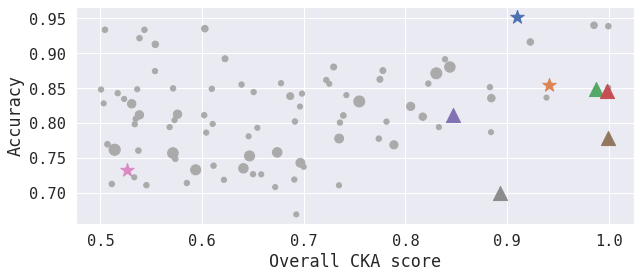

In [79]:
def pad(txt, maxL):
    if len(txt) >= maxL:
        return txt
    else:
        spaces_needed = maxL - len(txt)
        padded_txt = txt + " " * spaces_needed
        return padded_txt
    
sns.set(font_scale = 1.4)
plt.rcParams["font.family"] = "monospace"

maxL = 18

fig, ax = plt.subplots(figsize=[10, 4])

ax.scatter(score, acc, s=sizes, color="#aaaaaa")
plt.xlabel('Overall CKA score')
plt.ylabel('Accuracy')

# # You would need to have a list of labels of the same length as your data
# labels = range(len(score)) 

# for i, txt in enumerate(labels[:10]):
#     ax.annotate(txt+1, (score[i], acc[i]), fontsize=12) 

# plt.ylim(0.4,1)
# plt.xlim(0.4,1.2)

label_accs = []
pnets = []
for netmeta in resultdata.iloc:
    if netmeta.name in ['best_stitchnet','smallest_stitchnet', 'stitchnet27']:
        pnet = ax.scatter(netmeta.score, netmeta.acc, marker="*", s=200)
    else:
        pnet = ax.scatter(netmeta.score, netmeta.acc, marker="^", s=200)
    pnets.append(pnet)
    label_accs.append(f"{pad(netmeta.name,18)}|{netmeta.acc:.2f}|{netmeta.score:.2f}|{netmeta.macs/1e6:5.0f}M|{netmeta.params/1e6:5.1f}M")
# ax.legend(loc="best", ncol=3, bbox_to_anchor=(1,1))

# leg1 = plt.legend(pnets, label_accs, loc="best", ncol=1, bbox_to_anchor=(1,1), title=f"     {pad('name',18)}|acc |cka |  macs|params", title_fontsize=16, fontsize=16)
# # leg2 = plt.legend(pnets, ['']*len(pnets), loc="best", ncol=1, bbox_to_anchor=(1.4,1), title='cka')
# leg1._legend_box.align = "left"
# ax.add_artist(leg1)
# # ax.add_artist(leg2)

plt.savefig(f'{figFolder}/accvscka.eps',bbox_inches='tight')

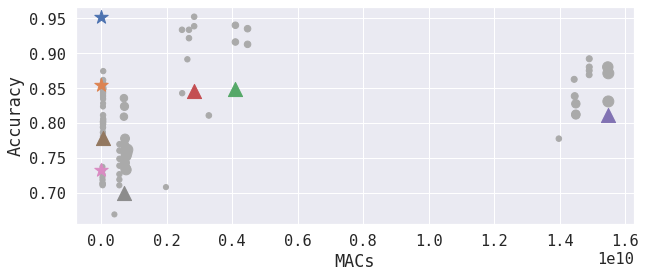

In [48]:
sns.set(font_scale = 1.4)
plt.rcParams["font.family"] = "monospace"

fig, ax = plt.subplots(figsize=[10, 4])

ax.scatter(macs, acc, s=sizes, color="#aaaaaa")
plt.xlabel('MACs')
plt.ylabel('Accuracy')
# plt.ylim(0.4,1)
# plt.xlim(0.4e8,0.7e8)

label_accs = []
pnets = []
for netmeta in resultdata.iloc:
    if netmeta.name in ['best_stitchnet','smallest_stitchnet', 'stitchnet27']:
        pnet = ax.scatter(netmeta.score, netmeta.acc, marker="*", s=200)
    else:
        pnet = ax.scatter(netmeta.macs, netmeta.acc, marker="^", s=200)
    pnets.append(pnet)
    label_accs.append(f"{pad(netmeta.name,18)}|{netmeta.acc:.2f}|{netmeta.score:.2f}|{netmeta.macs/1e6:5.0f}M|{netmeta.params/1e6:5.1f}M")
# ax.legend(loc="best", ncol=3, bbox_to_anchor=(1,1))

# leg1 = plt.legend(pnets, label_accs, loc="best", ncol=1, bbox_to_anchor=(1,1), title=f"     {pad('name',18)}|acc |cka |  macs|params", title_fontsize=16, fontsize=16)
# # leg2 = plt.legend(pnets, ['']*len(pnets), loc="best", ncol=1, bbox_to_anchor=(1.4,1), title='cka')
# leg1._legend_box.align = "left"
# ax.add_artist(leg1)
# # ax.add_artist(leg2)

# ax.legend(loc="best", ncol=3, bbox_to_anchor=(1,1))
plt.savefig(f'{figFolder}/accvsmacs.eps',bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


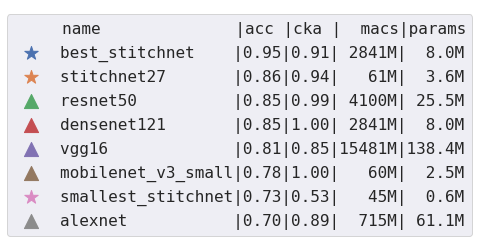

In [53]:
# figlegend = plt.figure()
# plt.set_visible(False)
plt.legend(pnets, label_accs, ncol=1, title=f"     {pad('name',18)}|acc |cka |  macs|params", title_fontsize=16, fontsize=16)
# figlegend.show()
plt.gca().set_axis_off()
plt.savefig(f'{figFolder}/accvsmacs_legend.eps',bbox_inches='tight')


In [ ]:
from skimage.io import imread
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPM, renderPDF
from pdf2image import convert_from_path

In [ ]:
# for idx in data['acc'].nsmallest(100).index:
#     item = data.iloc[idx]
#     if item.score > 0.9:
#         print(idx, item.score, item.acc)

In [ ]:
import os
sns.set(font_scale = 1.4)
def render_net(path):
    # if True or not os.path.exists(f"{path}.png"):
    drawing = svg2rlg(path)
    renderPDF.drawToFile(drawing, f'{path}.pdf')
    pages = convert_from_path(f'{path}.pdf', 600)
    pages[0].save(f'{path}.png', 'PNG')
    width = pages[0].width
    height = pages[0].height
    return width

def plot_net(ax, path, label):
    img = imread(path+'.png')
    ax.imshow(img)
    # ax.axis('off')
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    ax.get_yaxis().set_visible(False)
    # Hide grid lines
    ax.grid(False)
    ax.set_xlabel(label)

widths = []
# idxs = list(data['acc'].index)
idxs = [21,22,5,32,88]
for idx in idxs:
    netmeta = data.iloc[idx]
    width = render_net(netmeta.path)
    widths.append(width)

width_ratios = np.array(widths).astype(float)/max(widths)
# print(width_ratios)
fig, axs = plt.subplots(1,len(idxs),figsize=[10, 70],gridspec_kw={'width_ratios': width_ratios})
for ax in axs:
    ax.set_anchor('S')

for i,idx in enumerate(idxs):
    # print(i,idx)
    netmeta = data.iloc[idx]
    pages = plot_net(axs[i],netmeta.path, f'StitchNet{idx}\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M')

# netmeta = data.iloc[param_minidx]
# pages = plot_net(axs[0],netmeta.path, f'Smallest\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M')
# netmeta = data.iloc[acc_maxidx]
# plot_net(axs[1],netmeta.path, f'Best\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M')
# netmeta = data.iloc[param_maxidx]
# plot_net(axs[2],netmeta.path, f'Biggest\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M')
# netmeta = data.iloc[acc_minidx]
# plot_net(axs[3],netmeta.path, f'Worst\nacc={netmeta.acc:.2f}\ncka={netmeta.score:.2f}\n{netmeta.params/1e6:.2f}M')
# plot_net(axs[1],data.iloc[param_maxidx].path, f'Biggest')
# plot_net(axs[2],data.iloc[acc_maxidx].path, f'Best')
# plot_net(axs[3],data.iloc[acc_minidx].path, f'Worst')
plt.tight_layout()
plt.savefig(f'{figFolder}/stitchnets.eps',bbox_inches='tight')

In [ ]:
sns.set(font_scale = 1.6)

fig, axs = plt.subplots(1,len(originalNetNames),figsize=[10, 70],gridspec_kw={'wspace': 0.05,'width_ratios': [1,1,1.1,1,1.1]})
for ax in axs:
    ax.set_anchor('S')

for i,name in enumerate(originalNetNames): 
    if name == 'mobilenet_v3_small':
        textname = 'mobilenet'
    else:
        textname = name
    netmeta = originalValTrainAcc[name]
    plot_net(axs[i],f"_results/original/{name}.svg", f'{textname}')
    # plot_net(axs[i],f"_results/original/{name}.svg", f'{textname}\nacc={netmeta.valacc.item():.2f}\ncka={netmeta.score.item():.2f}\n{netmeta.params.item()/1e6:.2f}M')
    # plt.tight_layout()
    
plt.savefig(f'{figFolder}/originals.eps',bbox_inches='tight')



In [1]:
# from glob import glob
# import pandas as pd
# import os
# import seaborn as sns
# ftdata = {}
# filenames = sorted(glob('_results/finetune/*.txt'))
# for filename in filenames:
#     name = os.path.basename(filename).split('.')[0]    
#     ftdata[name] = pd.read_csv(filename, names=['num_samples','acc'])
# # ftdata

In [31]:
from glob import glob
import pandas as pd
import os
import seaborn as sns
ftdata = {}

nets = sorted(glob('_results/finetune/*'))
for net in nets:
    netname = os.path.basename(net)
    filenames = sorted(glob(f'{net}/*.txt'))
    allftdata = {}
    for filename in filenames:
        name = os.path.basename(filename).split('.')[0]    
        allftdata[name] = pd.read_csv(filename, names=['num_samples','acc'])
        
    netdata = {}
    xaxis = list(allftdata.values())[0].num_samples
    netdata[net] = np.array([x.acc for x in allftdata.values()])
    print(np.mean(netdata[net], 0), np.std(netdata[net], 0))

    ftdata[netname] = pd.DataFrame({
        'num_samples': xaxis,
        'acc': np.mean(netdata[net], 0),
        'accstd': np.std(netdata[net], 0)
    })
    # break

[0.64365422 0.76390963 0.83320236 0.873222   0.89866405 0.91371316
 0.92365422 0.92923379 0.93145383 0.93243615] [0.07442472 0.03536641 0.02803062 0.0172743  0.01215721 0.00738285
 0.00564928 0.00680615 0.00681616 0.00744255]
[0.50269155 0.54414538 0.59159136 0.64243615 0.69978389 0.75713163
 0.80426326 0.8411002  0.87102161 0.89895874] [0.10836893 0.12287592 0.12913623 0.12142713 0.09463879 0.07805804
 0.06430541 0.06268015 0.05515916 0.03909785]
[0.54667976 0.59007859 0.65345776 0.72628684 0.78992141 0.83992141
 0.87660118 0.90111984 0.91719057 0.92803536] [0.07983231 0.07576548 0.06596859 0.04991436 0.03646834 0.02622047
 0.02086634 0.01531385 0.01090833 0.00825196]
[0.52119843 0.60310413 0.69155206 0.73555992 0.78811395 0.8297446
 0.8829666  0.9375442  0.96756385 0.97428291] [0.06727223 0.08872473 0.09583218 0.10075146 0.12174982 0.11770351
 0.09683821 0.04685404 0.01553044 0.01043866]
[0.57691552 0.75603143 0.87514735 0.92681729 0.94923379 0.95925344
 0.9659725  0.9691945  0.97106

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


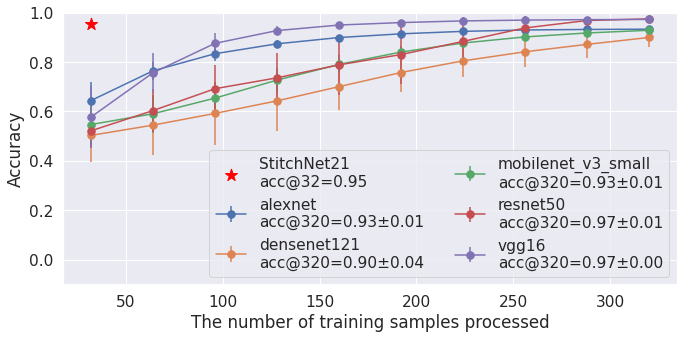

In [33]:
import matplotlib.pyplot as plt
sns.set_theme()
sns.set(font_scale = 1.4)

fig, ax = plt.subplots(1,1,figsize=[11, 5])
sns.set(font_scale = 1.4)

idxs = list(data['acc'].nlargest(1).index)
netmeta = data.iloc[idxs[0]]
k,series = list(ftdata.items())[0]
ax.scatter([32], netmeta.acc, marker="*", s=160, 
           color="red", label=f"StitchNet21\nacc@32={netmeta.acc:.2f}")
for k,series in ftdata.items():
    label = f'{k}\nacc@{max(series.num_samples)}={series.acc.iloc[-1]:.2f}±{series.accstd.iloc[-1]:.2f}'
    ax.errorbar(series.num_samples, series.acc, series.accstd, label=label, linestyle='-', marker='.', markersize=15)
    # ax.plot(series.num_samples, series.acc, '.-', markersize=15, label=label)
# plt.xlim(0,400)
plt.ylim(-0.1, 1)
ax.legend(loc=4, ncol=2)
plt.xlabel('The number of training samples processed')
plt.ylabel('Accuracy')

plt.savefig(f'{figFolder}/finetune.eps',bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


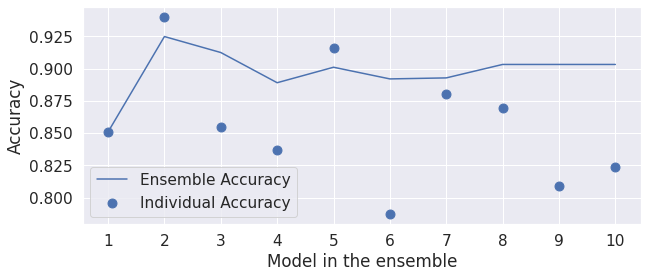

In [19]:
import pandas as pd

figFolder = f'_results/{RESULT_NAME}_figures'
os.makedirs(figFolder, exist_ok=True)

ensembleData = pd.read_csv(f'_results/{RESULT_NAME}_ensemble_10_T_0.8.txt', names=['acc', 'indvacc'])
accs = ensembleData.acc
indvaccs = ensembleData.indvacc

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set(font_scale = 1.4)

plt.figure(figsize=(10,4))
plt.plot(range(1,1+len(accs)), [d for d in accs], label='Ensemble Accuracy')
plt.scatter(range(1,1+len(indvaccs)), [d for d in indvaccs], s=80, label='Individual Accuracy')
plt.xlabel('Model in the ensemble')
plt.xticks(range(1,len(indvaccs)+1))
# plt.ylim(0.4,1)
plt.ylabel('Accuracy')
lgd = plt.legend(loc=3)


plt.savefig(f'{figFolder}/ensemble.eps', bbox_extra_artists=(lgd,), bbox_inches='tight')